# **Deep Learning: Convolutional Neural Networks**
This notebook introduces deep learning with Multilayer Perceptrons (MLPs) as an example. We will look at the following topics in this notebook

1. Data Preprocessing
2. Build the network
3. Train/Test the network
4. Experiment with hyperparameters
---



# **Setting up the environment**

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# **Data Preprocessing**
Here we will look at how to get the data ready to build our networks, train and test them. We will use MNIST dataset as an example. The MNIST dataset contains handwritten digits as shown in the following figure
![image.png](https://stathwang.github.io/images/mnist.png) 

We will use this data and look at:
1. Data Normalization/Standardization
2. Divide the data into train/validation/test subsets
3. Reshaping the data
3. Convert class labels into categorical variables

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28,28,1)

# the data, split between train and test sets 
# the data is already split between train and test. In practice, 
# we will have to manually split our data into train/test subsets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Look at the shape of the x_train and y_train
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure the images have shape (28,28,1)
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# **Coding the network**

In [ ]:
# Coding up a multilayer perceptron
def buildCNN (input_shape = input_shape, num_classes=num_classes):
  model = Sequential([
    keras.Input(shape=input_shape),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(8,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes,activation='softmax')       
  ])

  print(model.summary())
  return model


# **Train/Test the network**

In [ ]:
# Initialize the MLP model
cnn_MNIST = buildCNN(input_shape=input_shape,num_classes=num_classes)

# Define the optimizer and the loss function we want to use to train the network
opt = keras.optimizers.Adam(learning_rate=0.01)
cnn_MNIST.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Questions
# What is categorical cross entropy?
# What is adam optimizer? 

# Train the model
batch_size = 256
epochs = 10
cnn_MNIST.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.3)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 8)         2312      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                12864     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

Test loss: 0.06
Test accuracy: 0.99


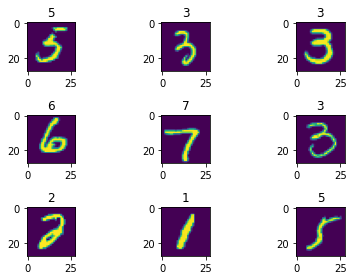

In [ ]:
# Test the trained network 
score = cnn_MNIST.evaluate(x_test, y_test, verbose=0)
print("Test loss:", round(score[0],2))
print("Test accuracy:", round(score[1],2))

# Display 9 randomly selected images and the corresponding predictions
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,3)
randomSample = np.random.choice(x_test.shape[0],9)
for i,sampleLocation in enumerate(randomSample):
  testImg = x_test[sampleLocation,:]
  testArr = testImg.reshape(1,28,28,1)
  m = i//3
  n = i%3
  ax[m,n].imshow(testImg.reshape(28,28))
  ax[m,n].set_title(np.argmax(cnn_MNIST.predict(testArr)))
fig.tight_layout()
plt.show()

# **Experiment with hyperparameters**
experiments
1. Change the size/structure of the network and see what happens
2. Try different activation functions: sigmoid, relu, tanh
3. Try different loss functions: mean_squared_error, mean_absolute_error, kl_divergence
4. Try different optimizers: sgd, rmsprop
5. Try different learning rates 
6. Change your batch size and number of epochs 
7. Add dropout
8. Try different kernel sizes
9. Try different max-pooling
